In [ ]:
import tensorflow as tf
import keras
from keras import models
from keras import layers
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np

from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

In [ ]:
# # Load the mnist dataset
# Referred to professor's pdf document: http://www.cs.iit.edu/~agam/cs512/share/cnna.p 

global xval
global yval

(xtrain, ytrain), (xval, yval) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
#1a)
#Split the data:
#Referred to: https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
# Referred to professor's pdf document: http://www.cs.iit.edu/~agam/cs512/share/cnna.p 

global x_train
global x_test
global y_test
global y_train 

x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.08333)

x_train = x_train.reshape((55000,28,28,1))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((5000,28,28,1))
x_test = x_test.astype('float32') / 255

xval = xval.reshape((10000,28,28,1))
xval = xval.astype('float32') / 255

print("Training data size: ",x_train.shape[0])
print("Testing data size: ",x_test.shape[0])
print("Validation data size: ",xval.shape[0])


Training data size:  55000
Testing data size:  5000
Validation data size:  10000


In [ ]:
#1b)Convert digit labels to odd and even and discard original
#Reference to build the code:

global target_train
global target_test
global target_val

code = lambda x: 0 if x % 2 == 0 else 1
vfunc = np.vectorize(code)

target_train = to_categorical(vfunc(y_train))
target_test = to_categorical(vfunc(y_test))
target_val = to_categorical(vfunc(yval))

In [ ]:
#1c)Create a neural network with 2 convolutional layers with pooling, a dropout layer and 2 fully connected layers. 
#1d) Use appropriate loss function, optimization algo and it's parameters.

#We use sigmoid function is because it exists between (0 to 1).

cnn = models.Sequential()

cnn.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(64,(3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Dropout(0.3))
cnn.add(layers.Conv2D(64,(3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(2,activation='sigmoid'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [ ]:
#Loss function : Stochastic Gradient Descent optimizer and Binary Cross Entropy 
#Model evaluation metrics: Accuracy
cnn.compile(optimizer='sgd',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model_fit = cnn.fit(x_train,target_train,epochs=5,batch_size=64,validation_data=(xval,target_val))
loss, acc = cnn.evaluate(x_test,target_test)
print("Loss of the model: ",loss)
print("Accuracy of the model: ",acc)

Epoch 1/5
860/860 [==============================] - 51s 59ms/step - loss: 0.5683 - accuracy: 0.7086 - val_loss: 0.3615 - val_accuracy: 0.8353
Epoch 2/5
860/860 [==============================] - 51s 59ms/step - loss: 0.3054 - accuracy: 0.8726 - val_loss: 0.2106 - val_accuracy: 0.9184
Epoch 3/5
860/860 [==============================] - 51s 59ms/step - loss: 0.2100 - accuracy: 0.9203 - val_loss: 0.1380 - val_accuracy: 0.9509
Epoch 4/5
860/860 [==============================] - 51s 59ms/step - loss: 0.1503 - accuracy: 0.9449 - val_loss: 0.0918 - val_accuracy: 0.9700
Epoch 5/5
157/157 [==============================] - 2s 10ms/step - loss: 0.0835 - accuracy: 0.9730
Loss of the model:  0.08350403606891632
Accuracy of the model:  0.9729999899864197


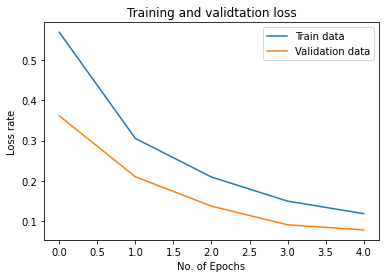

In [ ]:
 #1f) Training and validation loss as function of epochs
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Training and validtation loss')
plt.ylabel('Loss rate')
plt.xlabel('No. of Epochs')
plt.legend(['Train data', 'Validation data'])

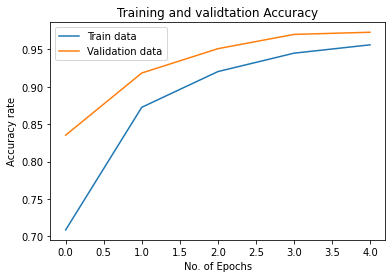

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Training and validtation Accuracy')
plt.ylabel('Accuracy rate')
plt.xlabel('No. of Epochs')
plt.legend(['Train data', 'Validation data'])

In [ ]:
# Increased the number of filters 
# Increased the kernel size
cnn_hypertune = models.Sequential()

cnn_hypertune.add(layers.Conv2D(64,(5,5), activation = 'relu', input_shape = (28,28,1)))
cnn_hypertune.add(layers.MaxPooling2D((2,2)))
cnn_hypertune.add(layers.Conv2D(128,(3,3), activation = 'relu'))
cnn_hypertune.add(layers.MaxPooling2D((2,2)))
cnn_hypertune.add(layers.Dropout(0.5))

cnn_hypertune.add(layers.Flatten())

cnn_hypertune.add(layers.Dense(64,activation='relu'))
cnn_hypertune.add(layers.Dense(2,activation='sigmoid'))
cnn_hypertune.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
# Optimizer is changed to rmsprop and loss function to categorical crossentropy
cnn_hypertune.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics = ["accuracy"])
model_fit2 = cnn_hypertune.fit(x_train,target_train,epochs=5,batch_size=64,validation_data=(xval,target_val))

Epoch 1/5
860/860 [==============================] - 109s 127ms/step - loss: 0.0976 - accuracy: 0.9633 - val_loss: 0.0274 - val_accuracy: 0.9896
Epoch 2/5
860/860 [==============================] - 108s 125ms/step - loss: 0.0394 - accuracy: 0.9865 - val_loss: 0.0188 - val_accuracy: 0.9938
Epoch 3/5
860/860 [==============================] - 109s 126ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.0175 - val_accuracy: 0.9942
Epoch 4/5
860/860 [==============================] - 108s 125ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0317 - val_accuracy: 0.9889
Epoch 5/5
860/860 [==============================] - 107s 124ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0170 - val_accuracy: 0.9947


In [ ]:
loss, acc = cnn_hypertune.evaluate(x_test,target_test)
print("Loss of the model: ",loss)
print("Accuracy of the model: ",acc)

157/157 [==============================] - 3s 17ms/step - loss: 0.0242 - accuracy: 0.9930
Loss of the model:  0.024242404848337173
Accuracy of the model:  0.9929999709129333


In [ ]:
#default values:  stride = (1,1),dropout = 0.5,optimizers = 'rmsprop', epoch = 5, kernel_init="glorot_uniform" 

def test_model_parameters(stride = (1,1),dropout = 0.5,optimizers = 'rmsprop', epoch = 5, kernel_init="glorot_uniform"):
  model = models.Sequential()

  model.add(layers.Conv2D(64,(5,5),strides= stride, activation = 'relu',kernel_initializer= kernel_init, input_shape = (28,28,1)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64,(3,3),strides= stride, activation = 'relu',kernel_initializer= kernel_init))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Dropout(dropout))
  model.add(layers.Flatten())

  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(2,activation='sigmoid'))

  model.compile(optimizer=optimizers, loss='categorical_crossentropy',metrics = ["accuracy"])
  model_fit3 = model.fit(x_train,target_train,epochs=epoch,batch_size=64,validation_data=(xval,target_val))


In [ ]:
#Test strides = (1,1), (2,2)
test_model_parameters(stride= (1,1))
test_model_parameters(stride = (2,2))


Epoch 1/5
860/860 [==============================] - 72s 84ms/step - loss: 0.1071 - accuracy: 0.9583 - val_loss: 0.0271 - val_accuracy: 0.9898
Epoch 2/5
860/860 [==============================] - 75s 87ms/step - loss: 0.0416 - accuracy: 0.9861 - val_loss: 0.0270 - val_accuracy: 0.9910
Epoch 3/5
860/860 [==============================] - 71s 82ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0210 - val_accuracy: 0.9933
Epoch 4/5
860/860 [==============================] - 71s 82ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0170 - val_accuracy: 0.9952
Epoch 5/5
860/860 [==============================] - 71s 82ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0175 - val_accuracy: 0.9941
Epoch 1/5
860/860 [==============================] - 13s 15ms/step - loss: 0.2192 - accuracy: 0.9115 - val_loss: 0.0803 - val_accuracy: 0.9716
Epoch 2/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0990 - accuracy: 0.9640 - val_loss: 0.0512 - val_accuracy: 0.9821

In [ ]:
test_model_parameters(stride= (2,2),dropout = 0.8)
test_model_parameters(stride= (2,2),dropout = 0.3)


Epoch 1/5
860/860 [==============================] - 13s 15ms/step - loss: 0.3117 - accuracy: 0.8654 - val_loss: 0.1974 - val_accuracy: 0.9192
Epoch 2/5
860/860 [==============================] - 13s 15ms/step - loss: 0.1700 - accuracy: 0.9377 - val_loss: 0.0809 - val_accuracy: 0.9720
Epoch 3/5
860/860 [==============================] - 13s 15ms/step - loss: 0.1462 - accuracy: 0.9476 - val_loss: 0.0728 - val_accuracy: 0.9742
Epoch 4/5
860/860 [==============================] - 12s 14ms/step - loss: 0.1366 - accuracy: 0.9517 - val_loss: 0.0687 - val_accuracy: 0.9771
Epoch 5/5
860/860 [==============================] - 13s 15ms/step - loss: 0.1359 - accuracy: 0.9523 - val_loss: 0.0973 - val_accuracy: 0.9672
Epoch 1/5
860/860 [==============================] - 13s 15ms/step - loss: 0.1977 - accuracy: 0.9198 - val_loss: 0.2221 - val_accuracy: 0.9067
Epoch 2/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0838 - accuracy: 0.9710 - val_loss: 0.0861 - val_accuracy: 0.9664

In [ ]:
#Weight Initializer
test_model_parameters(stride= (2,2),dropout = 0.3,kernel_init= "he_uniform")
test_model_parameters(stride= (2,2),dropout = 0.3,kernel_init= "glorot_uniform")

Epoch 1/5
860/860 [==============================] - 14s 16ms/step - loss: 0.2062 - accuracy: 0.9135 - val_loss: 0.0689 - val_accuracy: 0.9765
Epoch 2/5
860/860 [==============================] - 14s 17ms/step - loss: 0.0828 - accuracy: 0.9699 - val_loss: 0.0481 - val_accuracy: 0.9835
Epoch 3/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0635 - accuracy: 0.9782 - val_loss: 0.0508 - val_accuracy: 0.9816
Epoch 4/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0531 - accuracy: 0.9816 - val_loss: 0.0365 - val_accuracy: 0.9862
Epoch 5/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0481 - accuracy: 0.9837 - val_loss: 0.0365 - val_accuracy: 0.9869
Epoch 1/5
860/860 [==============================] - 13s 15ms/step - loss: 0.1826 - accuracy: 0.9263 - val_loss: 0.1302 - val_accuracy: 0.9510
Epoch 2/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0793 - accuracy: 0.9720 - val_loss: 0.0423 - val_accuracy: 0.9850

In [ ]:
#Optimizers
test_model_parameters(stride= (2,2),dropout = 0.3,kernel_init='glorot_uniform',optimizers="nadam")
test_model_parameters(stride= (2,2),dropout = 0.3,kernel_init='glorot_uniform',optimizers="rmsprop")
test_model_parameters(stride= (2,2),dropout = 0.3,kernel_init='glorot_uniform',optimizers="adam")

Epoch 1/5
860/860 [==============================] - 13s 16ms/step - loss: 0.1608 - accuracy: 0.9357 - val_loss: 0.0567 - val_accuracy: 0.9809
Epoch 2/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0692 - accuracy: 0.9761 - val_loss: 0.0652 - val_accuracy: 0.9771
Epoch 3/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0543 - accuracy: 0.9807 - val_loss: 0.0348 - val_accuracy: 0.9889
Epoch 4/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0456 - accuracy: 0.9841 - val_loss: 0.0319 - val_accuracy: 0.9886
Epoch 5/5
860/860 [==============================] - 14s 16ms/step - loss: 0.0379 - accuracy: 0.9874 - val_loss: 0.0341 - val_accuracy: 0.9880
Epoch 1/5
860/860 [==============================] - 14s 17ms/step - loss: 0.1905 - accuracy: 0.9241 - val_loss: 0.0881 - val_accuracy: 0.9684
Epoch 2/5
860/860 [==============================] - 13s 15ms/step - loss: 0.0825 - accuracy: 0.9704 - val_loss: 0.0462 - val_accuracy: 0.9846

In [ ]:
#Epochs
test_model_parameters(stride= (2,2),dropout = 0.3,kernel_init='glorot_uniform',optimizers="rmsprop",epoch=12)

Epoch 1/12
860/860 [==============================] - 13s 15ms/step - loss: 0.1800 - accuracy: 0.9283 - val_loss: 0.0628 - val_accuracy: 0.9788
Epoch 2/12
860/860 [==============================] - 13s 15ms/step - loss: 0.0790 - accuracy: 0.9729 - val_loss: 0.0524 - val_accuracy: 0.9828
Epoch 3/12
860/860 [==============================] - 13s 15ms/step - loss: 0.0615 - accuracy: 0.9792 - val_loss: 0.0599 - val_accuracy: 0.9798
Epoch 4/12
860/860 [==============================] - 13s 15ms/step - loss: 0.0514 - accuracy: 0.9821 - val_loss: 0.0351 - val_accuracy: 0.9879
Epoch 5/12
860/860 [==============================] - 13s 15ms/step - loss: 0.0443 - accuracy: 0.9851 - val_loss: 0.0382 - val_accuracy: 0.9865
Epoch 6/12
860/860 [==============================] - 13s 15ms/step - loss: 0.0418 - accuracy: 0.9860 - val_loss: 0.0302 - val_accuracy: 0.9895
Epoch 7/12
860/860 [==============================] - 12s 14ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0371 - val_accuracy:

In [71]:
enhanced_model = models.Sequential()

enhanced_model.add(layers.Conv2D(64,(5,5),strides= (2,2), activation = 'relu',kernel_initializer= "glorot_uniform", 
                                  input_shape = (28,28,1)))
enhanced_model.add(layers.MaxPooling2D((2,2)))
enhanced_model.add(layers.Conv2D(128,(3,3),strides= (2,2), activation = 'relu',kernel_initializer= "glorot_uniform"))
enhanced_model.add(layers.MaxPooling2D((2,2)))
enhanced_model.add(layers.Dropout(0.3))
enhanced_model.add(layers.Flatten())

enhanced_model.add(layers.Dense(64,activation='relu'))
enhanced_model.add(layers.Dense(2,activation='sigmoid'))

enhanced_model.summary()

enhanced_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics = ["accuracy"])
enhanced_fit = enhanced_model.fit(x_train,target_train,epochs=10,batch_size=64,validation_data=(xval,target_val))


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 12, 12, 64)        1664      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)              

In [ ]:
#q2 d,e,f,g
#Creating a final model and adding batch and layer normalization
from keras.layers.normalization import BatchNormalization

final = models.Sequential()

final.add(layers.Conv2D(64,(5,5),strides= (2,2), activation = 'relu',kernel_initializer= "glorot_uniform", 
                                  input_shape = (28,28,1)))
final.add(BatchNormalization())
final.add(layers.MaxPooling2D((2,2)))
final.add(layers.Conv2D(128,(3,3),strides= (2,2), activation = 'relu',kernel_initializer= "glorot_uniform"))
final.add(layers.MaxPooling2D((2,2)))
final.add(layers.Dropout(0.3))
final.add(layers.Flatten())

final.add(layers.Dense(64,activation='relu'))
final.add(layers.Dense(2,activation='sigmoid'))

final.summary()

final.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics = ["accuracy"])
model_fit3 = final.fit(x_train,target_train,epochs=10,batch_size=64,validation_data=(xval,target_val))


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 12, 12, 64)        1664      
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 128)             

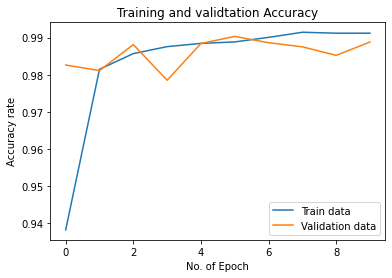

In [ ]:
#Accuracy plot
plt.plot(model_fit3.history['accuracy'])
plt.plot(model_fit3.history['val_accuracy'])
plt.title('Training and validtation Accuracy')
plt.ylabel('Accuracy rate')
plt.xlabel('No. of Epoch')
plt.legend(['Train data', 'Validation data'])


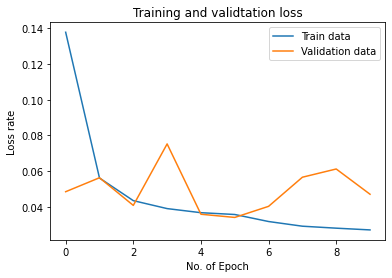

In [ ]:
plt.plot(model_fit3.history['loss'])
plt.plot(model_fit3.history['val_loss'])
plt.title('Training and validtation loss')
plt.ylabel('Loss rate')
plt.xlabel('No. of Epoch')
plt.legend(['Train data', 'Validation data'])

In [85]:
#Q3 Inference:

#Reference link: https://colab.research.google.com/notebooks/io.ipynb
from google.colab import files
digits_upload = files.upload()

Saving WhatsApp Image 2020-11-11 at 9.20.24 PM.jpeg to WhatsApp Image 2020-11-11 at 9.20.24 PM.jpeg


In [91]:
import cv2

def data_procession_and_prediction(img):
  # Resize the image 
  dim = (int(28), int(28))
  resized = cv2.resize(img, dim)

  #Convert to grayscale
  resize_gray_img = cv2.cvtColor(cv2.resize(img,(int(28),int(28))),cv2.COLOR_BGR2GRAY)

  gray_img = resize_gray_img.astype('float32') / 255

  # Convert to binary
  (threshold_,binary_img) = cv2.threshold(gray_img, 0.5, 1, cv2.THRESH_BINARY)
  binary_img  = np.where(binary_img == 0, 1, 0)
  
  label = (enhanced_model.predict(binary_img.reshape((1,28, 28, 1)))).argmax(axis=-1)

  result = "Image is even numbered " if label == 0 else "Image is odd numbered" 
  print(result)

  #Display binary image and original image in two separate windows
  plt.imshow(binary_img,cmap='gray')
  plt.title("Binary Image")
  plt.show()

  plt.imshow(img)
  plt.title("Original Image")
  plt.show()




Image is odd numbered


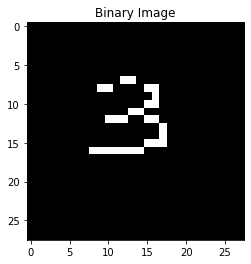

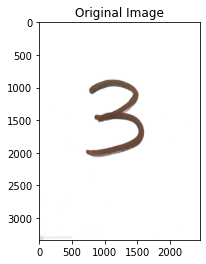

In [92]:
three = cv2.imread("WhatsApp Image 2020-11-11 at 9.20.24 PM.jpeg")

data_procession_and_prediction(three)